## Homework 1: Part 2
## Implementing regularized linear regression 
In this part, you will implement regularized linear regression and use it to
study models with different bias-variance properties. 

This notebook contains code that helps you get started on 
linear regression with regularization. 
You will need to complete functions in
**reg_linear_regressor.py** and **utils.py**.
Modify this notebook in places marked by **TODO:**.

## Regularized linear regression: an example
In this problem, you will implement regularized linear regression
to predict the amount of water flowing out of a dam using the change
of water level in a reservoir. We will begin by visualizing the dataset containing historical records on the
change in the water level $x$, and the amount of water $y$, flowing out of the dam.
This dataset is divided into three parts:
- A training set that you will use to learn the model:  X,  y.
- A validation set for determining the regularization parameter: Xval, yval.
- A test set for evaluating the performance of your model:  Xtest, ytest. These are unseen examples that were not used during the training of the model.

Run the cell below and it  will plot the training data as shown in Figure 6 in your assignment handout. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading and Visualizing Data ...


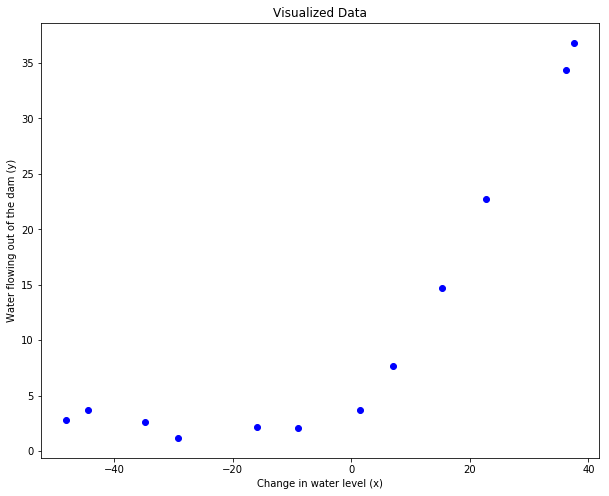

In [344]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import plot_utils
from reg_linear_regressor_multi import RegularizedLinearReg_SquaredLoss

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

########################################################################
## =========== Part 1: Loading and Visualizing Data ===================#
########################################################################
# Load Training Data

print('Loading and Visualizing Data ...')

X, y, Xtest, ytest, Xval, yval = utils.load_mat('ex2data1.mat')

# Plot training data
plot_utils.plot_data(X,y,'Change in water level (x)','Water flowing out of the dam (y)')
plt.title('Visualized Data')
plt.show()
#plt.savefig('Fig3.2.A1.pdf')

## Regularized Linear Regression cost function and gradient (vectorized)
You should now implement the loss function and gradient of the
loss function for regularized linear regression in **reg_linear_regression_multi.py**. Then run the cell below.
Regularized linear regression has the following cost function:
$$J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^{m} {( y^{(i)} - h_\theta(x^{(i)})}^2\right) + \frac{\lambda}{2m}\left( \sum_{j=1}^{n} {\theta_j}^2 \right) $$
where $\lambda$ is a regularization parameter which controls the degree of regularization
(thus, help preventing overfitting). The regularization term puts
a penalty on the overall cost $J(\theta)$. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Note that you should not regularize the $\theta_0$ term. You should now complete the code for the method loss in the class Reg_LinearRegression_SquaredLoss in the file reg_linear_regressor_multi.py to calculate $J(\theta)$. Vectorize your code and avoid writing for loops.

Correspondingly, the partial derivative of the regularized linear regression  cost function
with respect to  $\theta_j$ is defined as:
\begin{eqnarray*}
\frac{\partial J(\theta)}{\partial \theta_0} & = & \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}){x_j}^{(i)} \\
\frac{\partial J(\theta)}{\partial \theta_j} & = & \left(\frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)} ){x_j}^{(i)}\right) + \frac{\lambda}{m}{\theta_j} \; \; \; \mbox{ for }j \geq 1\\
\end{eqnarray*}
You should now complete the code for the method grad_loss in the class {Reg_LinearRegression_SquaredLoss in the file reg_linear_regressor_multi.py}
to  calculate the gradient, returning
it in the variable grad. 

Then evaluate the cell below. It runs the train method in  reg_linear_regressor_multi.py to compute the optimal value
of $\theta$. This training function uses scipy's fmin_bfgs to optimize the cost function.
Here we have set the regularization parameter $\lambda$ to zero. 

The best fit line plotted by the script  tells us that the model is
not a good fit to the data because the data is non-linear. While
visualizing the best fit as shown is one possible way to debug your learning
algorithm, it is not always easy to visualize the data and model. In the next
cell, you will implement a function to generate learning curves that can
help you debug your learning algorithm even if it is not easy to visualize the
data.

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
('Theta at lambda = 0 is ', array([13.08790353,  0.36777923]))


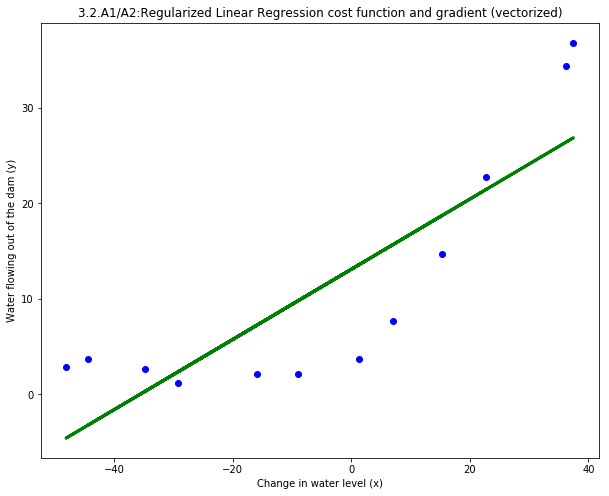

In [345]:
# append a column of ones to matrix X

XX = np.vstack([np.ones((X.shape[0],)),X]).T

#  Train linear regression with lambda = 0

reglinear_reg1 = RegularizedLinearReg_SquaredLoss()
theta_opt0 = reglinear_reg1.train(XX,y,reg=0.0,num_iters=1000)
print('Theta at lambda = 0 is ', theta_opt0)

# plot fit over data and show it (or save it in fig7.pdf)
plot_utils.plot_data(X,y,'Change in water level (x)','Water flowing out of the dam (y)')
plt.plot(X,np.dot(XX,theta_opt0),'g-',linewidth=3)
plt.title('3.2.A1/A2:Regularized Linear Regression cost function and gradient (vectorized)')
plt.show()
#plt.savefig('Fig3.2.A2.pdf')


## Learning curve for linear regression
An important concept in machine learning is the bias-variance tradeoff. Models
with high bias are not complex enough for the data and tend to underfit,
while models with high variance overfit  the training data.
Here you will plot training and test errors on a
learning curve to diagnose bias-variance problems.

A  learning curve plots
training and cross validation error as a function of training set size. You will complete the
function  learning_curve in utils.py so that it returns a vector of errors for the
training set and  validation set.
To obtain different training set sizes,
use different subsets of the original training set X. Specifically, for
a training set size of $i$, you should use the first $i$ examples.

You can use the train function to find the parameter $\theta$. Note
that the regularization $\lambda$  is passed as a parameter to the learning_curve function.
After learning the $\theta$ parameter, you should compute the error on the training
and validation sets. Recall that the training error for a dataset is
defined as:
$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^{m} {( y^{(i)} - h_\theta(x^{(i)})}^2\right)  $$


In particular, note that the training error does not include the regularization
term. One way to compute the training error is to use your existing
cost function and set the regularization parameter reg to 0 only when using it to compute the training error
and validation error. When you are computing the training set error,
make sure you compute it on the training subset
instead of the entire training set. However, for the validation error,
you should compute it over the entire validation set. You should store
the computed errors in the vectors error_train and error_val.
When you are finished, the cell below will print the learning curves and produce
a plot similar to Figure 8 in the assignment handout.

         Current function value: 0.575589
         Iterations: 2
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 0.499974
         Iterations: 1
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 36.120098
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 24.203237
         Iterations: 4
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 42.803055
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 39.232733
         Iterations: 3
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 34.650468
         Iterations: 3
         Function evaluations: 116
         Gradient evaluations: 104
         Current function value: 30.766806
         Iterat

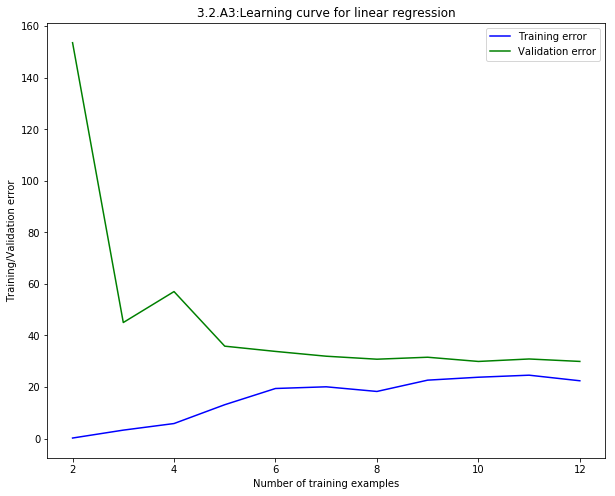

In [346]:
reg = 1.0
XXval = np.vstack([np.ones((Xval.shape[0],)),Xval]).T

# implement the learning_curve function in utils.py
# this script will run your function and show the learning curve

error_train, error_val = utils.learning_curve(XX,y,XXval,yval,reg)
plot_utils.plot_learning_curve(error_train, error_val,reg)
plt.title('3.2.A3:Learning curve for linear regression')
plt.show()
#plt.savefig('Fig3.2.A3.0.pdf')


## Polynomial regression: expanding the basis functions
The problem with our linear model was that it was too simple for the data
and resulted in underfitting (high bias). In this problem, you will address this issue by adding more features. In particular, you will consider hypotheses of the form
$$ h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \ldots + \theta_p x^p $$
This is still a linear model from the point of view of the parameter space. We have augmented the features with powers of $x$.
Code in the cell below builds these features using sklearn's preprocessing module. 

We use a polynomial of degree 6.
It turns out that if we run the training directly on the projected data,  it will
not work well as the features would be badly scaled (e.g., an example with
$x = 40$ will now have a feature $x^6 = 40^6 = 4.1 \times 10^{9}$). Therefore, you will
need to use feature normalization.
Before learning the parameter $\theta$ for the polynomial regression, the script in the cell below will
first call the **feature_normalize** function you wrote earlier. It will normalize the features of the training set,
storing the mu, sigma parameters separately. It will project the validation and test sets too, but normalize them using the same mu and sigma parameters.

In [347]:
from utils import feature_normalize
import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize
# We will consider a 6th order polynomial fit for the data

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(np.reshape(X,(len(X),1)))
X_poly, mu, sigma = utils.feature_normalize(X_poly)

# add a column of ones to X_poly

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# map Xtest and Xval into the same polynomial features

X_poly_test = poly.fit_transform(np.reshape(Xtest,(len(Xtest),1)))
X_poly_val = poly.fit_transform(np.reshape(Xval,(len(Xval),1)))

# normalize these two sets with the same mu and sigma

X_poly_test = (X_poly_test - mu) / sigma
X_poly_val = (X_poly_val - mu) / sigma

# add a column of ones to both X_poly_test and X_poly_val
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T

## Learning curves for polynomial regression
The cell below trains a linear model on the transformed data. After learning $\theta$, you should see two plots 
generated for polynomial regression with $\lambda= 0$.

         Current function value: 126.244468
         Iterations: 1
         Function evaluations: 101
         Gradient evaluations: 89
Theta at lambda = 0 is  [1.55526063 1.06599074 0.59708731 0.98894781 0.50968139 0.91467229
 0.45476893]


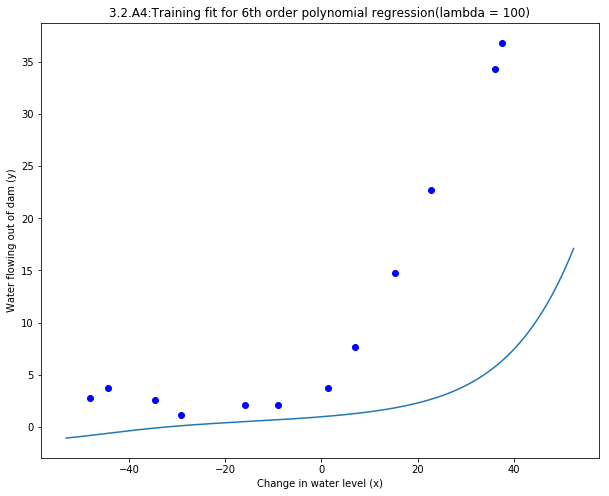

         Current function value: 147.665049
         Iterations: 3
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 57.182389
         Iterations: 4
         Function evaluations: 51
         Gradient evaluations: 40
         Current function value: 212.127862
         Iterations: 1
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 290.730681
         Iterations: 1
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 233.746429
         Iterations: 1
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 195.523609
         Iterations: 1
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 180.318632
         Iterations: 1
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 158.492717
      

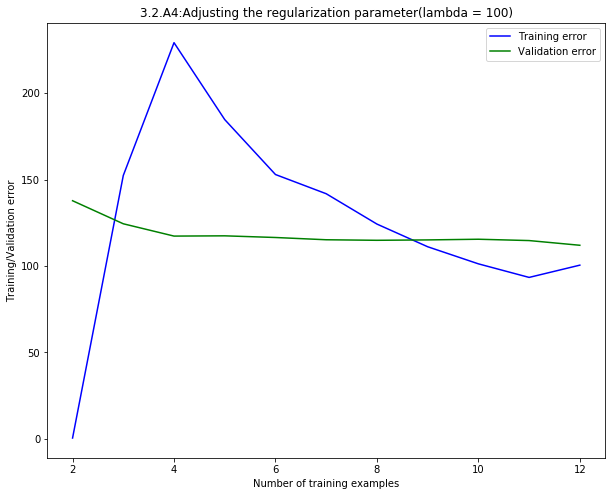

In [348]:
reg = 100
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt1 = reglinear_reg1.train(XX_poly,y,reg=reg,num_iters=10000)
print 'Theta at lambda = 0 is ', theta_opt1


# plot data and training fit for the 6th order polynomial 

plot_utils.plot_fit(X,y,np.min(X),np.max(X),mu,sigma,theta_opt1,p,'Change in water level (x)','Water flowing out of dam (y)','Polynomial Regression fit with lambda = 0 and polynomial features of degree = ' + str(p))
plt.title('3.2.A4:Training fit for 6th order polynomial regression(lambda = 100)')
plt.show()
#plt.savefig('Fig3.2.A4.4.pdf')

# plot learning curve for data (6th order polynomail basis function) 

error_train,error_val = utils.learning_curve(XX_poly,y,XX_poly_val,yval,reg)
plot_utils.plot_learning_curve(error_train,error_val,reg)
plt.title('3.2.A4:Adjusting the regularization parameter(lambda = 100)')
plt.show()
#plt.savefig('Fig3.2.A4.5.pdf')

## Adjusting the regularization parameter
You will now explore how the regularization parameter
affects the bias-variance of regularized polynomial regression. You should
now modify the  lambda parameter in the cell above and try $\lambda = 1, 10, 100$. For
each of these values, the script will generate a polynomial fit to the data
and also a learning curve. Submit two plots for each value of lambda: the fit as well as the learning curve. Comment on the impact of the choice of lambda on the quality of the learned model in your **writeup.pdf**. 

## Calculating test error on the best model
To get a better indication of a model's performance in the real
world, it is important to evaluate the final model on a test set that was
not used in any part of training (that is, it was neither used to select the regularization parameter, nor to learn the model parameters).
Calculate the error of the best model that you found with the previous analysis
and report it.

In [351]:
# TODO: your code for computing test error on the best model (model with the best lambda)
reg = 3
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt0 = reglinear_reg1.train(XX_poly,y,reg=reg,num_iters=10000)

error = reglinear_reg1.loss(theta_opt0,XX_poly_test, ytest,0)
print 'Best Error:' , error

         Current function value: 28.220735
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
Best Error: 8.337934572030457


## Selecting $\lambda$ using a validation set
You will implement an automated method to select the $\lambda$ parameter. Concretely, you will use a validation set to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using the 
validation set, we can then evaluate the model on the test set to estimate
how well the model will perform on actual unseen data.
**Complete the function validation_curve.m in utils.py**. Specifically,
you should should use the train method on an instance of the class Reg_Linear_Regressor to train the model using
different values of $\lambda$ and to compute the training error and  validation error.
You should try $\lambda$ in the following range: \{0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10\}.

After you have completed the code, run the cell below to plot a validation curve of $\lambda$ versus the error. This plot  allows you select
which $\lambda$ value to use. Due to randomness
in the training and validation splits of the dataset, the cross validation error
can sometimes be lower than the training error. Submit a pdf version of this plot in **writeup.pdf**. Comment on the best choice of $\lambda$ for this problem.

Optimization terminated successfully.
         Current function value: 0.198053
         Iterations: 44
         Function evaluations: 45
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.225496
         Iterations: 43
         Function evaluations: 44
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 0.275838
         Iterations: 42
         Function evaluations: 43
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 0.430709
         Iterations: 40
         Function evaluations: 41
         Gradient evaluations: 41
         Current function value: 0.804545
         Iterations: 37
         Function evaluations: 135
         Gradient evaluations: 123
         Current function value: 1.897136
         Iterations: 21
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 4.503742

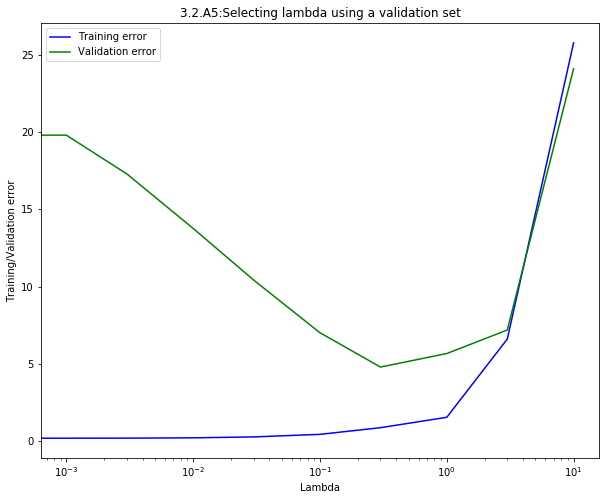

In [303]:
# now implement the validation_curve function in utils.py
# this function helps in determining the best lambda using a
# a validation set
# The code will now run your function and plot the figure 

reg_vec, error_train, error_val = utils.validation_curve(XX_poly,y,XX_poly_val,yval)
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.title('3.2.A5:Selecting lambda using a validation set')
plt.show()
#plt.savefig('Fig3.2.A5.0.pdf')

## Plotting learning curves with randomly selected examples 
In practice, especially for small training sets, when you plot learning curves
to debug your algorithms, it is often helpful to average across multiple sets
of randomly selected examples to determine the training error and 
validation error.
Concretely, to determine the training error and cross validation error for
$i$ examples, you should first randomly select $i$ examples from the training set
and $i$ examples from the  validation set. You will then learn the model parameters using the randomly chosen training set and evaluate the parameters on the randomly chosen training set and validation set. The above
steps should then be repeated multiple times (say 50) and the averaged error
should be used to determine the training error and cross validation error for
$i$ examples.
Implement the above
strategy for computing the learning curves. Complete the  function
**learning_curve_averaged** in  **utils.py** to generate compute and generate this plot. Then evaluate the cell below.

         Current function value: 82.094134
         Iterations: 3
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 110.743925
         Iterations: 3
         Function evaluations: 49
         Gradient evaluations: 38
         Current function value: 1.925239
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 111.885758
         Iterations: 4
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 1.925239
         Iterations: 2
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 47.333275
         Iterations: 3
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 1.754820
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 0.687854
         Iteration

         Gradient evaluations: 74
         Current function value: 1.687262
         Iterations: 10
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 21.317334
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 47.442138
         Iterations: 5
         Function evaluations: 115
         Gradient evaluations: 103
         Current function value: 1.646475
         Iterations: 9
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 52.418234
         Iterations: 2
         Function evaluations: 111
         Gradient evaluations: 99
         Current function value: 19.022731
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 40.180661
         Iterations: 3
         Function evaluations: 100
         Gradient evaluations: 88
         Current functi

         Iterations: 4
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 2.474400
         Iterations: 5
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 21.444871
         Iterations: 3
         Function evaluations: 46
         Gradient evaluations: 35
         Current function value: 42.507741
         Iterations: 3
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 1.663364
         Iterations: 3
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 46.381302
         Iterations: 5
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 12.423871
         Iterations: 3
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 14.686850
         Iterations: 5
         Function evaluations: 115
 

         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 36.023153
         Iterations: 4
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 28.252384
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 0.699617
         Iterations: 10
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 25.316621
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 13.692883
         Iterations: 3
         Function evaluations: 116
         Gradient evaluations: 104
         Current function value: 27.494693
         Iterations: 3
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 37.049455
         Iterations: 7
         Function evaluations: 

         Current function value: 20.888542
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 18.968823
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 24.040987
         Iterations: 12
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 29.201031
         Iterations: 7
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 18.965688
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 19.678870
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 22.307231
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 18.307908
         Itera

         Current function value: 28.060082
         Iterations: 11
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 22.968155
         Iterations: 4
         Function evaluations: 50
         Gradient evaluations: 39
         Current function value: 9.617587
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 9.516556
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 22.015735
         Iterations: 4
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 17.554371
         Iterations: 5
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 20.619701
         Iterations: 9
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 20.840960
         Iterati

         Current function value: 18.357316
         Iterations: 4
         Function evaluations: 111
         Gradient evaluations: 99
         Current function value: 17.963939
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 24.076021
         Iterations: 7
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 9.570715
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 21.195654
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 17.954522
         Iterations: 8
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 20.472572
         Iterations: 8
         Function evaluations: 59
         Gradient evaluations: 47
         Current function value: 18.825906
         Iterat

         Iterations: 7
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 18.192010
         Iterations: 3
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 15.808420
         Iterations: 4
         Function evaluations: 119
         Gradient evaluations: 107
         Current function value: 20.142906
         Iterations: 10
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 18.129119
         Iterations: 7
         Function evaluations: 120
         Gradient evaluations: 108
         Current function value: 17.306179
         Iterations: 6
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 20.351653
         Iterations: 7
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 15.862524
         Iterations: 6
         Function evaluations: 1

         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 17.900515
         Iterations: 11
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 15.127176
         Iterations: 7
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 15.716964
         Iterations: 7
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 18.051054
         Iterations: 8
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 13.342814
         Iterations: 6
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 17.637403
         Iterations: 10
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 18.175854
         Iterations: 10
         Function evaluations: 89
         Gradient ev

         Gradient evaluations: 97
         Current function value: 15.841159
         Iterations: 7
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 13.430456
         Iterations: 14
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 16.292247
         Iterations: 8
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 14.826038
         Iterations: 4
         Function evaluations: 54
         Gradient evaluations: 43
         Current function value: 12.598292
         Iterations: 7
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 15.782272
         Iterations: 7
         Function evaluations: 57
         Gradient evaluations: 46
         Current function value: 15.844683
         Iterations: 9
         Function evaluations: 87
         Gradient evaluations: 75
         Current functio

         Iterations: 9
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 11.285641
         Iterations: 7
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 12.345621
         Iterations: 8
         Function evaluations: 65
         Gradient evaluations: 54
         Current function value: 14.649405
         Iterations: 12
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 14.726620
         Iterations: 12
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 12.531798
         Iterations: 7
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 14.173643
         Iterations: 14
         Function evaluations: 68
         Gradient evaluations: 56
         Current function value: 13.966811
         Iterations: 9
         Function evaluations: 109


         Iterations: 15
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 12.133902
         Iterations: 17
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 12.133902
         Iterations: 17
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 12.133902
         Iterations: 17
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 12.133902
         Iterations: 17
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 12.133902
         Iterations: 17
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 12.133902
         Iterations: 17
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 12.133902
         Iterations: 17
         Function evaluati

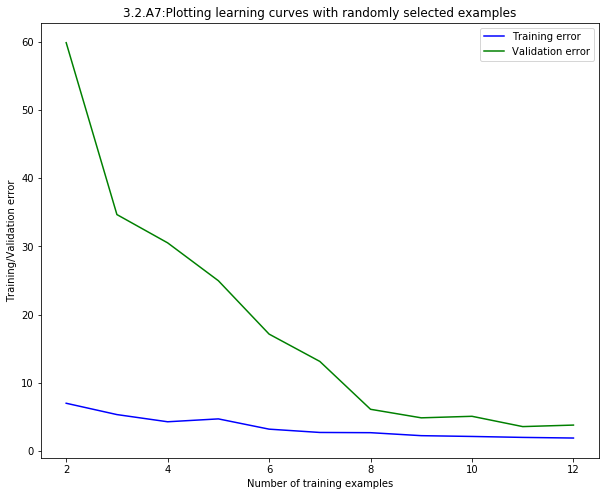

In [305]:
# now implement the averaged learning curve function in utils.py
# The script runs your function, plots the curves and saves it in fig11.pdf

reg = 1.0
error_train,error_val = utils.averaged_learning_curve(XX_poly,y,XX_poly_val,yval,reg)
plot_utils.plot_learning_curve(error_train,error_val,reg)
plt.title('3.2.A7:Plotting learning curves with randomly selected examples')
plt.show()
#plt.savefig('Fig3.2.A7.0.pdf')


## Extra Credit: Building regularized models for Boston data set
Perform a bias variance analysis of the Boston housing data set with the thirteen predictors, following the steps on the simple data set above. Use sklearn's  built-in functions to split the data into training, validation and test sets. What is the lowest achievable error on the test set with $\lambda = 0$? Select the best value for $\lambda$ and report the test set error with the best $\lambda$. Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. What is the test set error with quadratic features with the best $\lambda$ chosen with the validation set? What is the test set error with cubic features with the best $\lambda$ chosen with the validation set? Put your analysis code in a separate Python script or notebook called bostonexpt.py or bostonexpt.ipynb. Present your results analytically with plots to support your findings. Discuss the impact of regularization for building good models for the Boston housing data set.

In [391]:
### TODO: your Boston code here or in a separate notebook.
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import feature_normalize
import utils
import plot_utils
from reg_linear_regressor_multi import RegularizedLinearReg_SquaredLoss


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

print 'Reading data ...'
bdata = load_boston()
df = pd.DataFrame(data = bdata.data, columns = bdata.feature_names)
X = df.values
y = bdata.target

#Using 80/20 split for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#Splitting training data 80/20 for training/validation
X_train,X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

#Performing Normalization
X_train_norm,mu,sigma = utils.feature_normalize(X_train)
X_test_norm = (X_test - mu) / sigma
X_validation_norm = (X_validation - mu) / sigma

XX_train = np.vstack([np.ones((X_train_norm.shape[0],)),X_train_norm.T]).T
XX_test = np.vstack([np.ones((X_test_norm.shape[0],)),X_test_norm.T]).T
XX_validation = np.vstack([np.ones((X_validation_norm.shape[0],)),X_validation_norm.T]).T


#Train linear regression with lambda = 0
reglinear_reg1 = RegularizedLinearReg_SquaredLoss()
theta_opt0 = reglinear_reg1.train(XX_train,y_train,reg=0.0,num_iters=1000)
print('Theta at lambda = 0 is ', theta_opt0)

#Returning error for best theta at lambda = 0
error = reglinear_reg1.loss(theta_opt0,XX_test, y_test,0)
print error
#Best error = 12.56 when lambda  = 0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Reading data ...
Optimization terminated successfully.
         Current function value: 10.704763
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
('Theta at lambda = 0 is ', array([22.78606828, -0.90712405,  0.77113172,  0.30656756,  0.78974217,
       -2.24567276,  3.62049867, -0.06826566, -3.21658798,  1.86276906,
       -1.43851795, -2.09464883,  1.21630609, -3.30575885]))
12.560598275182448


Optimization terminated successfully.
         Current function value: 10.704763
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 10.705649
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 10.707420
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 10.713620
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
         Current function value: 10.731334
         Iterations: 20
         Function evaluations: 57
         Gradient evaluations: 47
         Current function value: 10.793326
         Iterations: 19
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 10.97

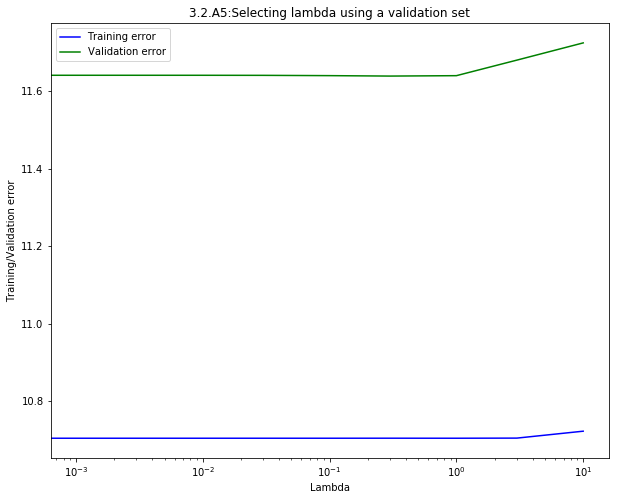

In [360]:
#Obtain validation curve 
reg_vec, error_train, error_val = utils.validation_curve(XX_train,y_train,XX_validation,y_validation)
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.title('3.2.A5:Selecting lambda using a validation set')
plt.show()


In [362]:
#Looks like 1 is the best lambda
reg = 1
reglinear_reg1 = RegularizedLinearReg_SquaredLoss()
theta_opt0 = reglinear_reg1.train(XX_train,y_train,reg,num_iters=1000)
print('Theta at lambda = 0 is ', theta_opt0)

#Returning error for best theta at lambda = 0
error = reglinear_reg1.loss(theta_opt0,XX_test, y_test,0)
print error
#Best error = 12.56 when lambda = 1

         Current function value: 11.590439
         Iterations: 18
         Function evaluations: 89
         Gradient evaluations: 78
('Theta at lambda = 0 is ', array([22.78556668, -0.90597326,  0.76951664,  0.30685871,  0.78937402,
       -2.24812865,  3.62022998, -0.0717315 , -3.21742566,  1.86107802,
       -1.43521823, -2.09564999,  1.21607642, -3.30447383]))
12.559906820037757


In [390]:
#Convert to quadratic
p = 2
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_train, mu, sigma = utils.feature_normalize(X_poly_train)

# add a column of ones to X_poly_train
XX_poly_train = np.vstack([np.ones((X_poly_train.shape[0],)),X_poly_train.T]).T

# map X_test and X_validation into the same polynomial features

X_poly_test = poly.fit_transform(X_test)
X_poly_val = poly.fit_transform(X_validation)

# normalize these two sets with the same mu and sigma

X_poly_test = (X_poly_test - mu) / sigma
X_poly_val = (X_poly_val - mu) / sigma

# add a column of ones to both X_poly_test and X_poly_val
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T
print X_poly_train.shape

(323L, 104L)


Optimization terminated successfully.
         Current function value: 1.846693
         Iterations: 928
         Function evaluations: 932
         Gradient evaluations: 932
Theta at lambda = 0 is  [ 2.27860681e+01 -7.83433224e+01  1.02169656e+01 -5.73919998e+01
  1.10229100e+01  4.03461067e+01  1.25046001e+01  2.28157304e+01
 -3.23623089e-01 -7.30692204e+00  4.79753261e+01  3.90174116e+00
  1.44648717e+01  1.39413011e+01  7.01890948e-01 -3.68895850e-01
  7.44027284e+01  2.61300496e+00 -8.87974678e+00  7.35769742e+00
 -2.46862805e+00 -1.64904243e-01  4.37283539e+01 -1.71122947e+02
  1.31589630e+02 -1.05349403e+00  2.78286625e+00 -7.80294907e-01
 -4.08379385e-01 -1.45670703e-02 -1.28509124e+01  5.76706561e+00
  8.20524303e-01 -4.31468849e+00 -1.02292620e+00  6.07863965e+00
 -2.74774183e+00  1.33202404e+00 -1.18234241e+00  8.83144167e+00
 -1.15066189e+00  1.13658988e+01  2.10803555e+01  1.40244825e+00
  3.00051318e+00  2.27288952e+00  1.10135241e+00 -8.04056598e-01
  1.29377791e+01 -1.1

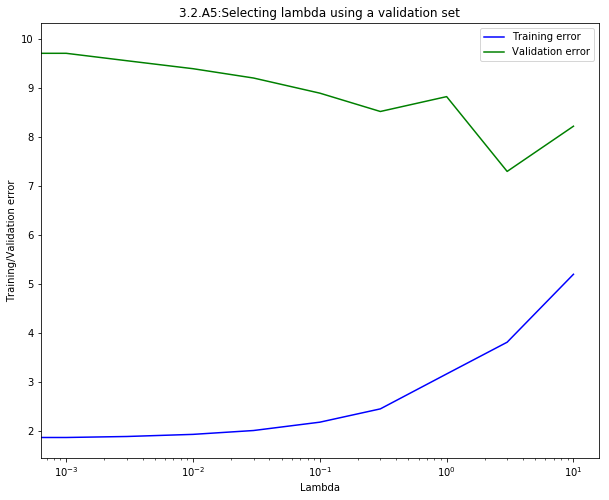

In [381]:
reg = 0
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt1 = reglinear_reg1.train(XX_poly_train,y_train,reg,num_iters=10000)
print 'Theta at lambda = 0 is ', theta_opt1

#Validation study on different values of lambda for polynomial order 2
reg_vec, error_train, error_val = utils.validation_curve(XX_poly_train,y_train,XX_poly_val,y_validation)
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.title('3.2.A5:Selecting lambda using a validation set')
plt.show()

In [382]:
#Best lambda for quadratic fxn seems to be 3
#Evaluating test error with lambda = 3
reg = 3
reglinear_reg1 = RegularizedLinearReg_SquaredLoss()
theta_opt0 = reglinear_reg1.train(XX_poly_train,y_train,reg,num_iters=1000)
print('Theta at lambda = 0 is ', theta_opt0)

#Returning error for best theta at lambda = 0
error = reglinear_reg1.loss(theta_opt0,XX_poly_test, y_test,0)
print error
#Best error for quadratic fxn is 6.0225

         Current function value: 7.702644
         Iterations: 24
         Function evaluations: 90
         Gradient evaluations: 78
('Theta at lambda = 0 is ', array([ 2.27834661e+01,  2.82860393e-01, -1.06516901e+00,  1.25227796e+00,
        1.40931446e+00,  1.18571589e+00,  2.80003844e+00,  1.18146968e+00,
       -2.04911657e+00,  2.17283464e+00,  1.13963880e+00,  6.38695484e-01,
        5.73984779e-01,  1.21602625e-01,  1.66305405e+00,  1.93250550e-01,
        3.11028240e-01,  4.23736519e+00, -4.25325568e-01, -1.84007054e+00,
        1.95200491e-01, -5.13090852e-01, -3.82924519e-01, -4.93140346e-02,
        1.16002891e-01, -2.72858757e-01, -3.98254686e-01,  6.98075673e-01,
       -4.91179890e-02, -2.06634724e-01, -6.91705057e-01,  2.03215548e-01,
        6.99975146e-01, -2.88379243e-01, -1.29171850e+00,  1.86478344e+00,
        1.64564515e+00, -6.39561587e-01, -1.28591474e+00,  9.93288814e-01,
        1.21808647e-01,  6.83075918e-01, -1.58200058e+00,  6.98574853e-01,
       -6.385

In [398]:
#Convert to cubic
p = 3
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_train, mu, sigma = utils.feature_normalize(X_poly_train)

# add a column of ones to X_poly_train
XX_poly_train = np.vstack([np.ones((X_poly_train.shape[0],)),X_poly_train.T]).T

# map X_test and X_validation into the same polynomial features

X_poly_test = poly.fit_transform(X_test)
X_poly_val = poly.fit_transform(X_validation)

# normalize these two sets with the same mu and sigma

X_poly_test = (X_poly_test - mu) / sigma
X_poly_val = (X_poly_val - mu) / sigma

# add a column of ones to both X_poly_test and X_poly_val
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T

         Current function value: 3.541050
         Iterations: 20
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 3.541926
         Iterations: 20
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 3.543679
         Iterations: 20
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 3.549815
         Iterations: 20
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 3.567346
         Iterations: 20
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 3.628699
         Iterations: 20
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 3.803953
         Iterations: 20
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 4.402882
         Iterations:

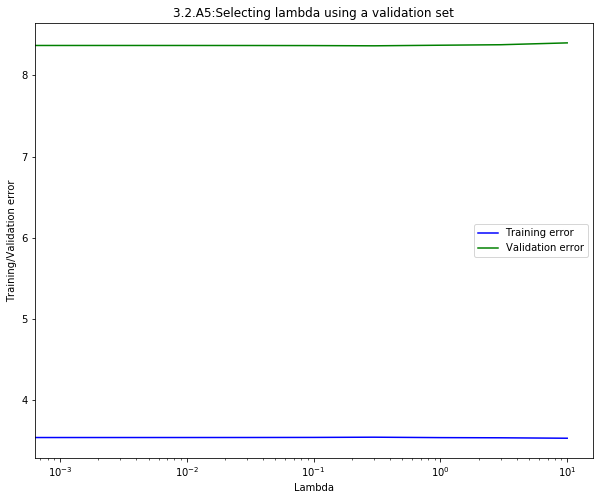

In [404]:
#Validation study on different values of lambda for polynomial order 3 (evaluated at 20 iterations as 1000 took too long to run)
reg_vec, error_train, error_val = utils.validation_curve(XX_poly_train,y_train,XX_poly_val,y_validation)
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.title('3.2.A5:Selecting lambda using a validation set')
plt.show()

In [403]:
#Best lambda for cubic fxn seems to be 1
#Evaluating test error with lambda = 
reg = 1
reglinear_reg1 = RegularizedLinearReg_SquaredLoss()
theta_opt0 = reglinear_reg1.train(XX_poly_train,y_train,reg,num_iters=1000)
print('Theta at lambda = 0 is ', theta_opt0)

#Returning error for best theta at lambda = 0
error = reglinear_reg1.loss(theta_opt0,XX_poly_test, y_test,0)
print error
#Best error for cubic fxn is 6.03

         Current function value: 6.126325
         Iterations: 20
         Function evaluations: 29
         Gradient evaluations: 29
('Theta at lambda = 0 is ', array([ 2.27851586e+01,  8.41910103e-02, -1.32328444e-01,  3.81159397e-01,
        2.14055236e-01,  3.99677846e-01,  1.17400278e+00,  4.27822151e-01,
       -6.08081333e-02,  5.10995399e-01,  3.77642921e-01,  6.93602003e-02,
        5.54095618e-01,  1.16625137e-01,  1.29661483e-01,  3.41772257e-03,
        7.87857258e-02,  4.70530835e-01, -3.93638423e-02, -1.91604733e-01,
        8.18130929e-02,  7.63174117e-02, -1.35474225e-02,  3.29160371e-02,
        6.21882566e-02,  7.25007461e-02, -6.13460180e-02,  5.37726067e-02,
       -1.38082143e-01,  1.79790237e-02, -1.35207177e-01,  1.12674017e-02,
       -6.55118404e-02, -1.24312165e-01, -1.30043458e-01,  8.86808136e-02,
        7.70372778e-03, -1.20259354e-01, -2.94557120e-01,  3.39318778e-01,
        2.19792866e-01,  2.31212517e-01,  7.44728085e-02,  2.41656937e-01,
       -1.151

In [407]:
#The impact of regularization for the Boston datasets seems to be that regularization can help decrease error in the models
#by picking the golden point between overfitted and underfitted (too much bias vs too much variance) particularly among the 
#higher order models although our models were not great at higher orders due to the massive amount of features compared to the
#relatively small number of data points in the set